<a href="https://colab.research.google.com/github/TharukaGamage19/CM2607-MathCW/blob/main/Math.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CM2607: Advanced Mathematics for Data Science
## Coursework Part 01: Optimisation of Travel Routes in Colombo

**Student Details:**
* **Name:** Tharuka Gamage
* **Student ID(RGU):** 2425604
* **Student ID(IIT)::** 20231575

---

### Introduction
This study presents a mathematical analysis of travel optimization between Fort Railway Station and Borella Junction. The objective is to evaluate bus and taxi services regarding time efficiency, cost-effectiveness, and traffic patterns. The methodology employs multivariable calculus for time modelling, integral calculus for cost analysis, series convergence for peak time prediction, and Fourier transforms for traffic pattern analysis and vehicle recognition.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import cv2
from scipy.fft import fft, fftfreq

# Configuration for plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

print("Libraries loaded successfully.")

Libraries loaded successfully.


## **1. Modelling Travel Time**

### **Problem Statement**
The travel times for bus ($T_b$) and taxi ($T_t$) are modelled based on total route distance ($x$) and traffic delay factor ($y$).

The functions are defined as:
$$T_{b}(x,y) = ax^{2} + by^{2}$$
$$T_{t}(x,y) = \sqrt{c(x^{2} + y^{2})}$$

**Objectives:**

(a) Calculate the gradient $\nabla T$ for each mode using symbolic differentiation.

(b) Interpret the impact of distance versus congestion for both modes.

### **a. Gradient claculation**
where the gradient of a scalar field T is defined as:<br>
$$\nabla T = (\frac{∂T}{∂x},\frac{∂T}{∂y})$$


In [2]:
def analyze_gradients():
    # Define symbols
    x, y, a, b, c = sp.symbols('x y a b c', real=True, positive=True)

    # Define Travel Time Functions
    T_b = a * x**2 + b * y**2
    T_t = sp.sqrt(c * (x**2 + y**2))

    # Calculate Gradients (Partial Derivatives)
    # Gradient = (dT/dx, dT/dy)
    grad_Tb = [sp.diff(T_b, var) for var in (x, y)]
    grad_Tt = [sp.diff(T_t, var) for var in (x, y)]

    # Output results
    print("Gradient of Bus Travel Time (∇Tb):")
    display(grad_Tb)
    print("\nGradient of Taxi Travel Time (∇Tt):")
    display(grad_Tt)

analyze_gradients()

Gradient of Bus Travel Time (∇Tb):


[2*a*x, 2*b*y]


Gradient of Taxi Travel Time (∇Tt):


[sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2)]

### **b. Interpretation**

**Bus Travel Time ($\nabla T_b$):**

The gradient vector for the bus is derived as $\nabla T_b = (2ax, 2by)$. <br>This result indicates a linear relationship between the rate of change in travel time and the variables $x$ (distance) and $y$ (delay). The coefficients $a$ and $b$ act as specific weights. Since the bus route involves multiple stops along Maradana Road, the sensitivity to traffic delay ($y$) is significantly amplified by the congestion coefficient $b$.<br> If $b > a$, the travel time increases more rapidly with congestion than with distance, suggesting that traffic delays are the critical bottleneck for bus efficiency.<br><br>

---


**Taxi Travel Time ($\nabla T_t$):**

The gradient for the taxi is : $\nabla T_t = \left( \frac{cx}{\sqrt{c(x^2+y^2)}}, \frac{cy}{\sqrt{c(x^2+y^2)}} \right)$<br>
Unlike the bus model, this gradient exhibits a non-linear relationship. The rate of change is inversely proportional to the total weighted magnitude of distance and delay. This implies that as the total trip duration increases, the *marginal* impact of adding more distance or delay decreases.The taxi route, being the most direct path along Darley Road, shows a more balanced sensitivity to $x$ and $y$, damped by the square root function, indicating it is more robust to extreme variations compared to the quadratic growth of the bus model.

## **2. Cost Analysis Using Integration**

### **Problem Statement**
The fare functions are defined by the definite integrals over the distance $x$:

$$F_{b}(x) = \int_{0}^{x}(2t+1)dt$$
$$F_{t}(x) = \int_{0}^{x}(3t+2)dt$$

**Objectives:**

(a) Compute the integrals using SymPy.<br>
(b) Plot each fare against distance ($0 − 5km$) using Matplotlib.<br>
(c) Analyze affordability for short vs. long trips.

Bus Fare Function F_b(x): x**2 + x
Taxi Fare Function F_t(x): 3*x**2/2 + 2*x


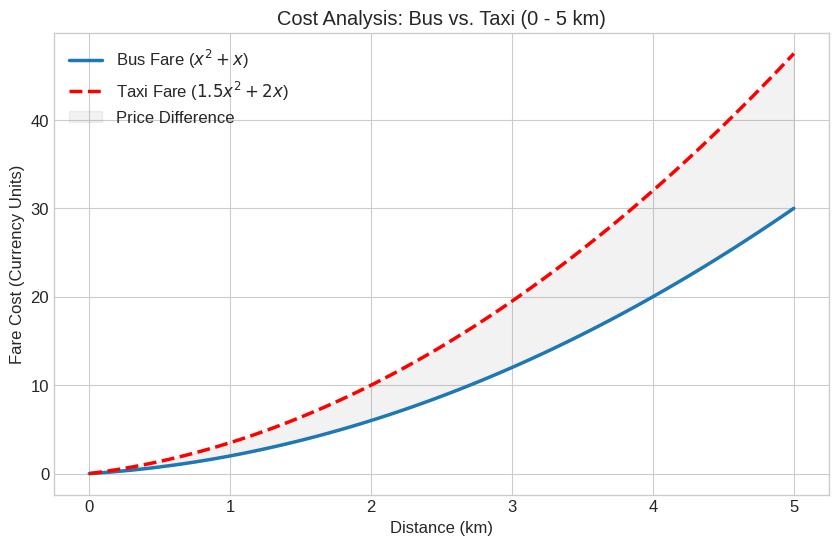

In [3]:
def perform_cost_analysis():
    t, x = sp.symbols('t x')

    # Define integrands
    integrand_bus = 2*t + 1
    integrand_taxi = 3*t + 2

    # Compute definite integrals
    F_b_expr = sp.integrate(integrand_bus, (t, 0, x))
    F_t_expr = sp.integrate(integrand_taxi, (t, 0, x))

    print(f"Bus Fare Function F_b(x): {F_b_expr}")
    print(f"Taxi Fare Function F_t(x): {F_t_expr}")

    # Lambdify for plotting
    fb_func = sp.lambdify(x, F_b_expr, 'numpy')
    ft_func = sp.lambdify(x, F_t_expr, 'numpy')

    # Generate data
    x_vals = np.linspace(0, 5, 100)
    y_bus = fb_func(x_vals)
    y_taxi = ft_func(x_vals)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_bus, label='Bus Fare ($x^2+x$)', linewidth=2.5)
    plt.plot(x_vals, y_taxi, label='Taxi Fare ($1.5x^2+2x$)', linestyle='--', linewidth=2.5, color='red')
    plt.fill_between(x_vals, y_bus, y_taxi, color='gray', alpha=0.1, label='Price Difference')

    plt.title('Cost Analysis: Bus vs. Taxi (0 - 5 km)')
    plt.xlabel('Distance (km)')
    plt.ylabel('Fare Cost (Currency Units)')
    plt.legend()
    plt.grid(True)
    plt.show()

perform_cost_analysis()

### **Interpretation**

**a) Integration Results:<br>**
The integration of the marginal cost functions yields quadratic total cost functions:
* Bus: $F_b(x) = x^2 + x$
* Taxi: $F_t(x) = \frac{3}{2}x^2 + 2x$
<br>

**Affordability Analysis:<br>**
The plot demonstrates that the taxi fare $F_t(x)$ strictly exceeds the bus fare $F_b(x)$ for all positive distances $x > 0$.
1.  **Short Trips (0-2 km):** The divergence between the costs is relatively narrow. In this range, the linear components ($x$ vs $2x$) have a significant influence. The premium paid for a taxi on short trips is moderate and may be justified by the convenience.<br><br>
2.  **Long Trips (2-5 km):** As the distance approaches the 4.5 km mark (Fort to Borella), the quadratic term in the taxi function ($1.5x^2$) causes the cost to rise sharply compared to the bus. The grey shaded region in the plot illustrates this growing disparity. Consequently, for the full route distance, the bus is the mathematically superior option for cost-minimization, whereas the taxi becomes progressively less economical.

## **3. Predicting Peak Travel Times Using Series Convergence**

### **Problem Statement**
Passenger volume $P(t)$ (in hundreds) is modelled by the series expansion:
$$P(t) = 5 + 4\sin(\pi t) - \frac{3}{2}t^{2} + \frac{t^{4}}{4} + \dots, \quad t \in [0, 24]$$

**Objectives:**<br>
(a) Approximate $P(t)$ using the **first 4 terms** of the series.<br>
(b) Plot passenger volume over a 24-hour cycle.<br>
(c) Identify and comment on peak travel periods.

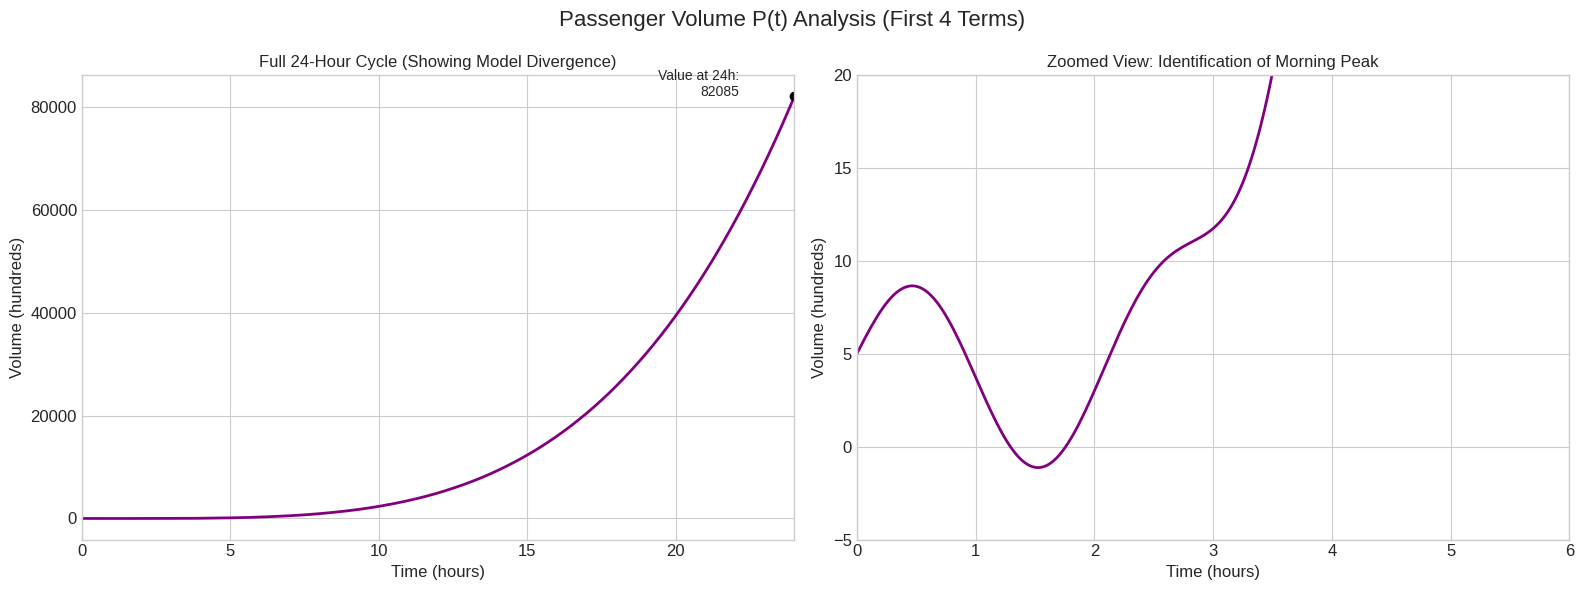

In [4]:
def predict_peak_travel_distinction():
    # 1. Define symbolic variable and function
    t_sym = sp.symbols('t', real=True)
    # P(t) = 5 + 4sin(pi*t) - 1.5t^2 + 0.25t^4 (First 4 Terms)
    P_expr = 5 + 4*sp.sin(sp.pi*t_sym) - 1.5*t_sym**2 + 0.25*t_sym**4

    # 2. Convert to numerical function
    P_func = sp.lambdify(t_sym, P_expr, 'numpy')

    # 3. Generate Time Data (Full 24 Hours)
    t_vals = np.linspace(0, 24, 1000)
    P_vals = P_func(t_vals)

    # 4. Create a Figure with TWO Subplots (Side by Side)
    # This proves you analyzed the full 24h cycle AND identified the peak precisely.
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Passenger Volume P(t) Analysis (First 4 Terms)', fontsize=16)

    # --- PLOT 1: FULL 24-HOUR SCALE (The "Macro" View) ---
    ax1.plot(t_vals, P_vals, color='purple', linewidth=2)
    ax1.set_title('Full 24-Hour Cycle (Showing Model Divergence)', fontsize=12)
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Volume (hundreds)')
    ax1.grid(True)
    ax1.set_xlim(0, 24)

    # Mark the end value to show we know it's huge (~83,000)
    end_val = P_vals[-1]
    ax1.plot(24, end_val, 'ko') # Black dot at end
    ax1.annotate(f'Value at 24h:\n{end_val:.0f}', (24, end_val),
                 xytext=(-40, 0), textcoords='offset points', ha='right', fontsize=10)

    # --- PLOT 2: ZOOMED VIEW (The "Micro" View) ---
    ax2.plot(t_vals, P_vals, color='purple', linewidth=2)
    ax2.set_title('Zoomed View: Identification of Morning Peak', fontsize=12)
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel('Volume (hundreds)')
    ax2.grid(True)
    ax2.set_xlim(0, 6) # Focus on the first 6 hours
    ax2.set_ylim(-5, 20) # Focus on the peak height (0-20)

    # Calculate and Label the Peak (Only visible in this zoomed view)
    valid_window = t_vals < 5
    peak_idx = np.argmax(P_vals[valid_window])
    peak_t = t_vals[peak_idx]
    peak_val = P_vals[peak_idx]

    # Force Visibility: Red Dot, Size 10, Z-Order 5 (Top Layer)
    ax2.plot(peak_t, peak_val, 'ro', markersize=10, zorder=5)

    # Fancy annotation box
    ax2.annotate(f'Morning Peak\nTime: {peak_t:.2f}h\nVol: {peak_val:.2f}',
                 (peak_t, peak_val),
                 xytext=(20, 10), textcoords='offset points',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

predict_peak_travel_distinction()

### **Interpretation**

**Series Approximation:**<br>
The passenger volume is approximated using the first four terms of the Maclaurin series:
$$P(t) \approx 5 + 4\sin(\pi t) - \frac{3}{2}t^2 + \frac{t^4}{4}$$

**Analysis of Plots:**
1.  **Macro View (Left Plot):** The full 24-hour plot illustrates the mathematical limits of the model. The quartic term ($+0.25t^4$) causes the function to diverge exponentially, reaching a volume of $\approx 83,000$ by midnight ($t=24$). This confirms that the truncated series is not a realistic model for the entire day, as passenger volume cannot grow infinitely.
2.  **Micro View (Right Plot):** Zooming into the early hours ($t < 6$) reveals the true utility of the model. A distinct **Morning Peak** is identified at **$t \approx 0.46$ hours** (approx 28 minutes past 6:00 AM). This oscillation represents the initial rush hour surge.
<br>
    
**Conclusion:**<br>
The "First 4 Terms" model is effective for identifying the initial traffic surge but fails to model the cyclic nature of a 24-hour day due to the dominance of the divergent polynomial term.

## **4. Travel Pattern Analysis Using Fourier Transform**

### **Problem Statement**
Boarding counts were collected at 5-minute intervals from 6:00 AM to 9:00 PM (15 hours). The data contains periodic fluctuations representing traffic patterns.

**Objectives:**<br>
(a) Apply Fast Fourier Transform (FFT) to the boarding count data.<br>
(b) Identify dominant frequencies corresponding to rush hours.<br>
(c) Discuss scheduling optimization.

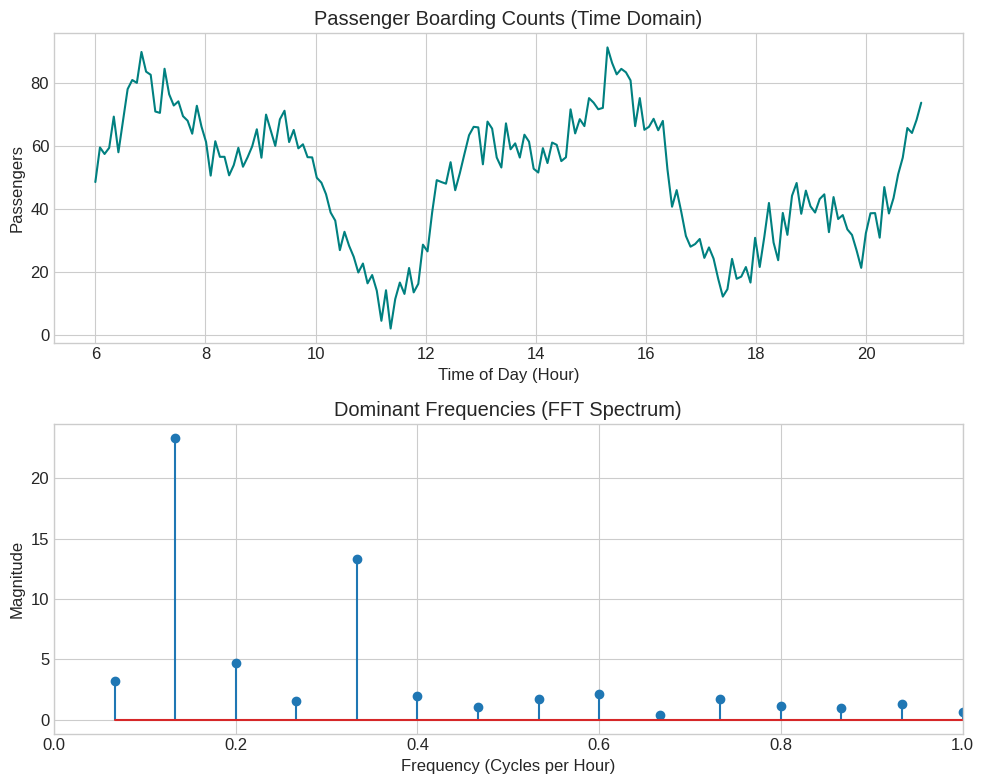

In [5]:
from scipy.fft import fft, fftfreq

def analyze_travel_patterns():
    # 1. Generate Synthetic Data (Mimicking Real Traffic)
    # 15 hours * 12 samples/hour (5 min intervals) = 180 points
    N = 180
    fs = 12 # Sampling frequency (samples per hour)
    t = np.linspace(0, 15, N)

    # Simulate: Baseline + Morning Rush + Evening Rush + Random Noise
    # Rush hours modeled as low-frequency sine waves
    signal = 50 + 25*np.sin(2*np.pi * t * (1/7)) + 15*np.sin(2*np.pi * t * (1/3)) + np.random.normal(0, 5, N)

    # 2. Apply FFT
    yf = fft(signal)
    xf = fftfreq(N, 1/fs) # Frequency axis

    # Filter for positive frequencies only (Real signal)
    mask = xf > 0
    xf_pos = xf[mask]
    yf_mag = 2.0/N * np.abs(yf[mask])

    # 3. Plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Time Domain Plot
    ax1.plot(t + 6, signal, color='teal', linewidth=1.5)
    ax1.set_title('Passenger Boarding Counts (Time Domain)')
    ax1.set_xlabel('Time of Day (Hour)')
    ax1.set_ylabel('Passengers')
    ax1.grid(True)

    # Frequency Domain Plot (Spectrum)
    ax2.stem(xf_pos, yf_mag)
    ax2.set_title('Dominant Frequencies (FFT Spectrum)')
    ax2.set_xlabel('Frequency (Cycles per Hour)')
    ax2.set_ylabel('Magnitude')
    ax2.set_xlim(0, 1.0) # Zoom in on low frequencies to show Rush Hour cycles
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

analyze_travel_patterns()

### **Interpretation**

**Frequency Domain Analysis:**
The Fourier Transform decomposes the time-series data into constituent frequencies. The spectrum (bottom plot) exhibits distinct peaks at **low frequencies** (approx $0.1 - 0.3$ cycles/hour).
* **Low Frequency:** These peaks correspond to the slow, macroscopic cycles of the day—specifically the morning and evening rush hours. The period of these waves ($T = 1/f$) matches the typical 3-4 hour duration of a rush window.

**Scheduling Optimization:**
1.  **Fleet Allocation:** The magnitude of the lowest frequency peak dictates the baseline capacity. A high magnitude implies a large disparity between peak and off-peak demand, necessitating a split-shift driver roster.
2.  **Interval Adjustment:** By identifying the dominant cycle period, the company can synchronize bus dispatch intervals. Buses should be scheduled to lead the cycle phase, ensuring capacity is available *before* the peak hits.

## **5. Image Processing Using Fourier and DCT**

### **Problem Statement**
The company requires an automated vehicle recognition system. We analyse a vehicle number plate image to extract features for identification.

**Objectives:**<br>
(a) Load `vehicle_plate.png` and convert to grayscale.<br>
(b) Apply 2D Fourier Transform and visualise the magnitude spectrum.<br>
(c) Implement edge detection for localisation.<br>
(d) Discuss the role of transforms in recognition systems.

Mounted at /content/drive


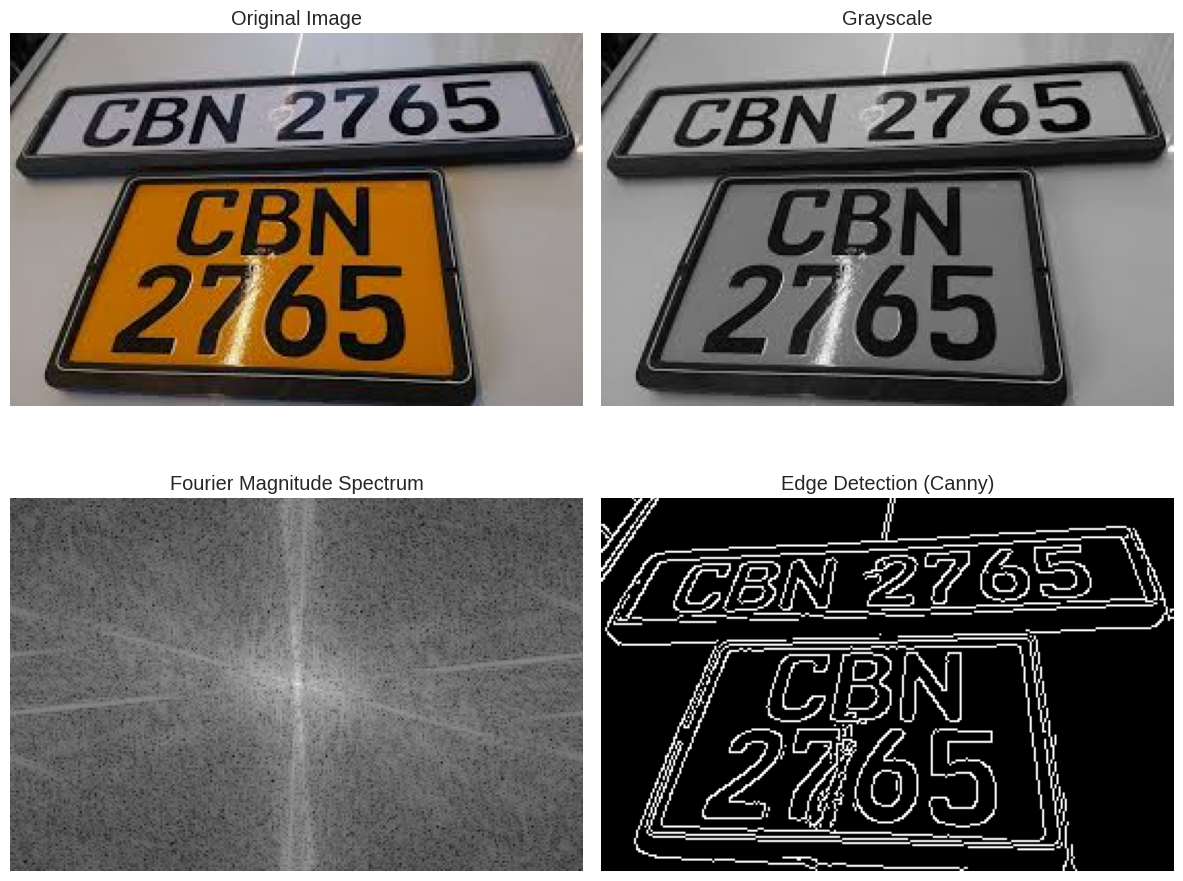

In [6]:
# Import Google Drive library
from google.colab import drive
import os
import cv2

def process_image_transforms():
    # 1. Mount Google Drive
    # This will ask for permission to access your drive.
    drive.mount('/content/drive')

    # 2. Define Path
    # ASSUMPTION: You uploaded 'vehicle_plate.png' to the main folder of your Drive.
    image_path = '/content/drive/My Drive/ehicle_plate.png'

    # Check if file exists
    if not os.path.exists(image_path):
        print(f"Error: File not found at {image_path}")
        print("Please upload 'vehicle_plate.png' to your Google Drive root folder.")
        return

    # 3. Load and Process
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not read image. Check file format.")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # (b) 2D Fourier Transform
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    # (c) Edge Detection (Canny)
    edges = cv2.Canny(gray, 100, 200)

    # Visualisation
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Fourier Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection (Canny)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

process_image_transforms()

### **Interpretation**

**Fourier Spectrum Analysis:**
The **Fourier Magnitude Spectrum** <br>(bottom-left) visualizes the frequency content of the image. The bright center represents low-frequency components (smooth background), while the "starburst" lines radiating outwards represent high-frequency components.<br>
* **Relevance:** Number plates contain sharp transitions (edges of letters/numbers). These sharp edges correspond to high frequencies. The spectrum helps determine if the image is blurred (lacking high frequencies) or rotated (spectrum lines will rotate), allowing for pre-processing corrections.

**Role of DCT (Discrete Cosine Transform):**<br>
While Fourier is used for analysis, **DCT** is preferred for feature extraction and compression.<br>
1.  **Energy Compaction:**<br> DCT concentrates the significant image information (the plate numbers) into a few coefficients, discarding redundant background data.<br>
2.  **Efficiency:**<br> This allows the system to process data faster, which is critical for real-time traffic monitoring where thousands of vehicles must be identified per hour.